# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [21]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [22]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [23]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

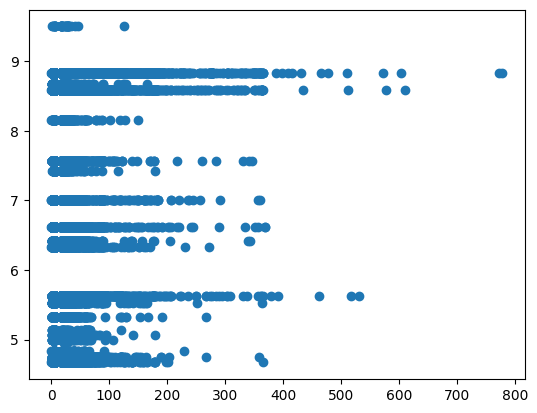

In [26]:
plt.scatter(data=df, x='length_of_stay', y='flight_duration')

In [28]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [33]:
df[(df['wants_extra_baggage'] == 1) & (df['wants_preferred_seat'] == 1) & (df['wants_in_flight_meals'] == 1)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
10,2,Internet,RoundTrip,185,25,14,2,AKLDEL,United Kingdom,1,1,1,5.52,0
11,1,Internet,RoundTrip,8,43,2,6,AKLDEL,New Zealand,1,1,1,5.52,0
14,1,Internet,RoundTrip,245,34,4,2,AKLDEL,New Zealand,1,1,1,5.52,0
37,6,Internet,RoundTrip,20,22,3,5,AKLICN,South Korea,1,1,1,6.62,0
41,1,Internet,RoundTrip,71,90,7,4,AKLICN,South Korea,1,1,1,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49966,2,Internet,RoundTrip,23,6,0,4,PENTPE,Italy,1,1,1,4.67,1
49970,2,Internet,RoundTrip,52,6,10,7,PENTPE,Malaysia,1,1,1,4.67,1
49977,2,Internet,RoundTrip,15,6,16,2,PENTPE,Malaysia,1,1,1,4.67,1
49985,1,Internet,RoundTrip,26,6,13,3,PERPNH,Australia,1,1,1,5.62,0


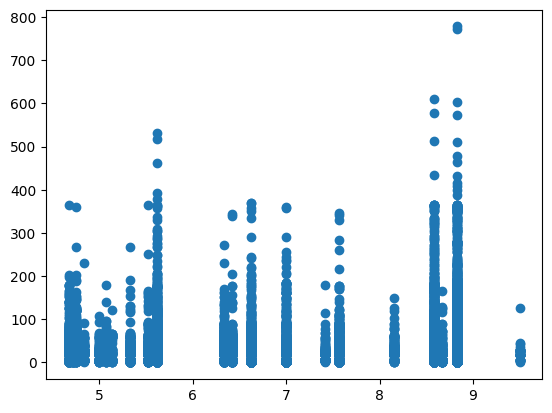

In [48]:
#visualize wants_extra_buggage and booking completed
plt.scatter(df['flight_duration'], df['length_of_stay'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [30]:
numeric_var = ["num_passengers","purchase_lead","length_of_stay","flight_hour","flight_day","wants_extra_baggage","wants_preferred_seat","wants_in_flight_meals","flight_duration","booking_complete"]
categorical_var = ["sales_channel","trip_type","route","booking_origin"]


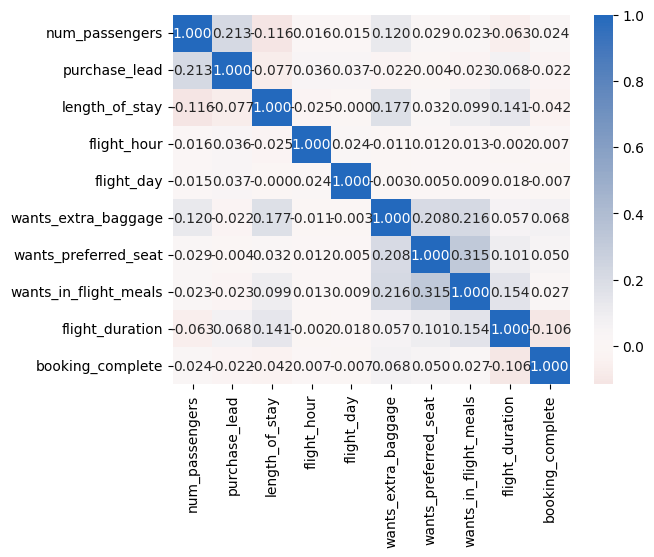

In [32]:
sb.heatmap(df[numeric_var].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show()

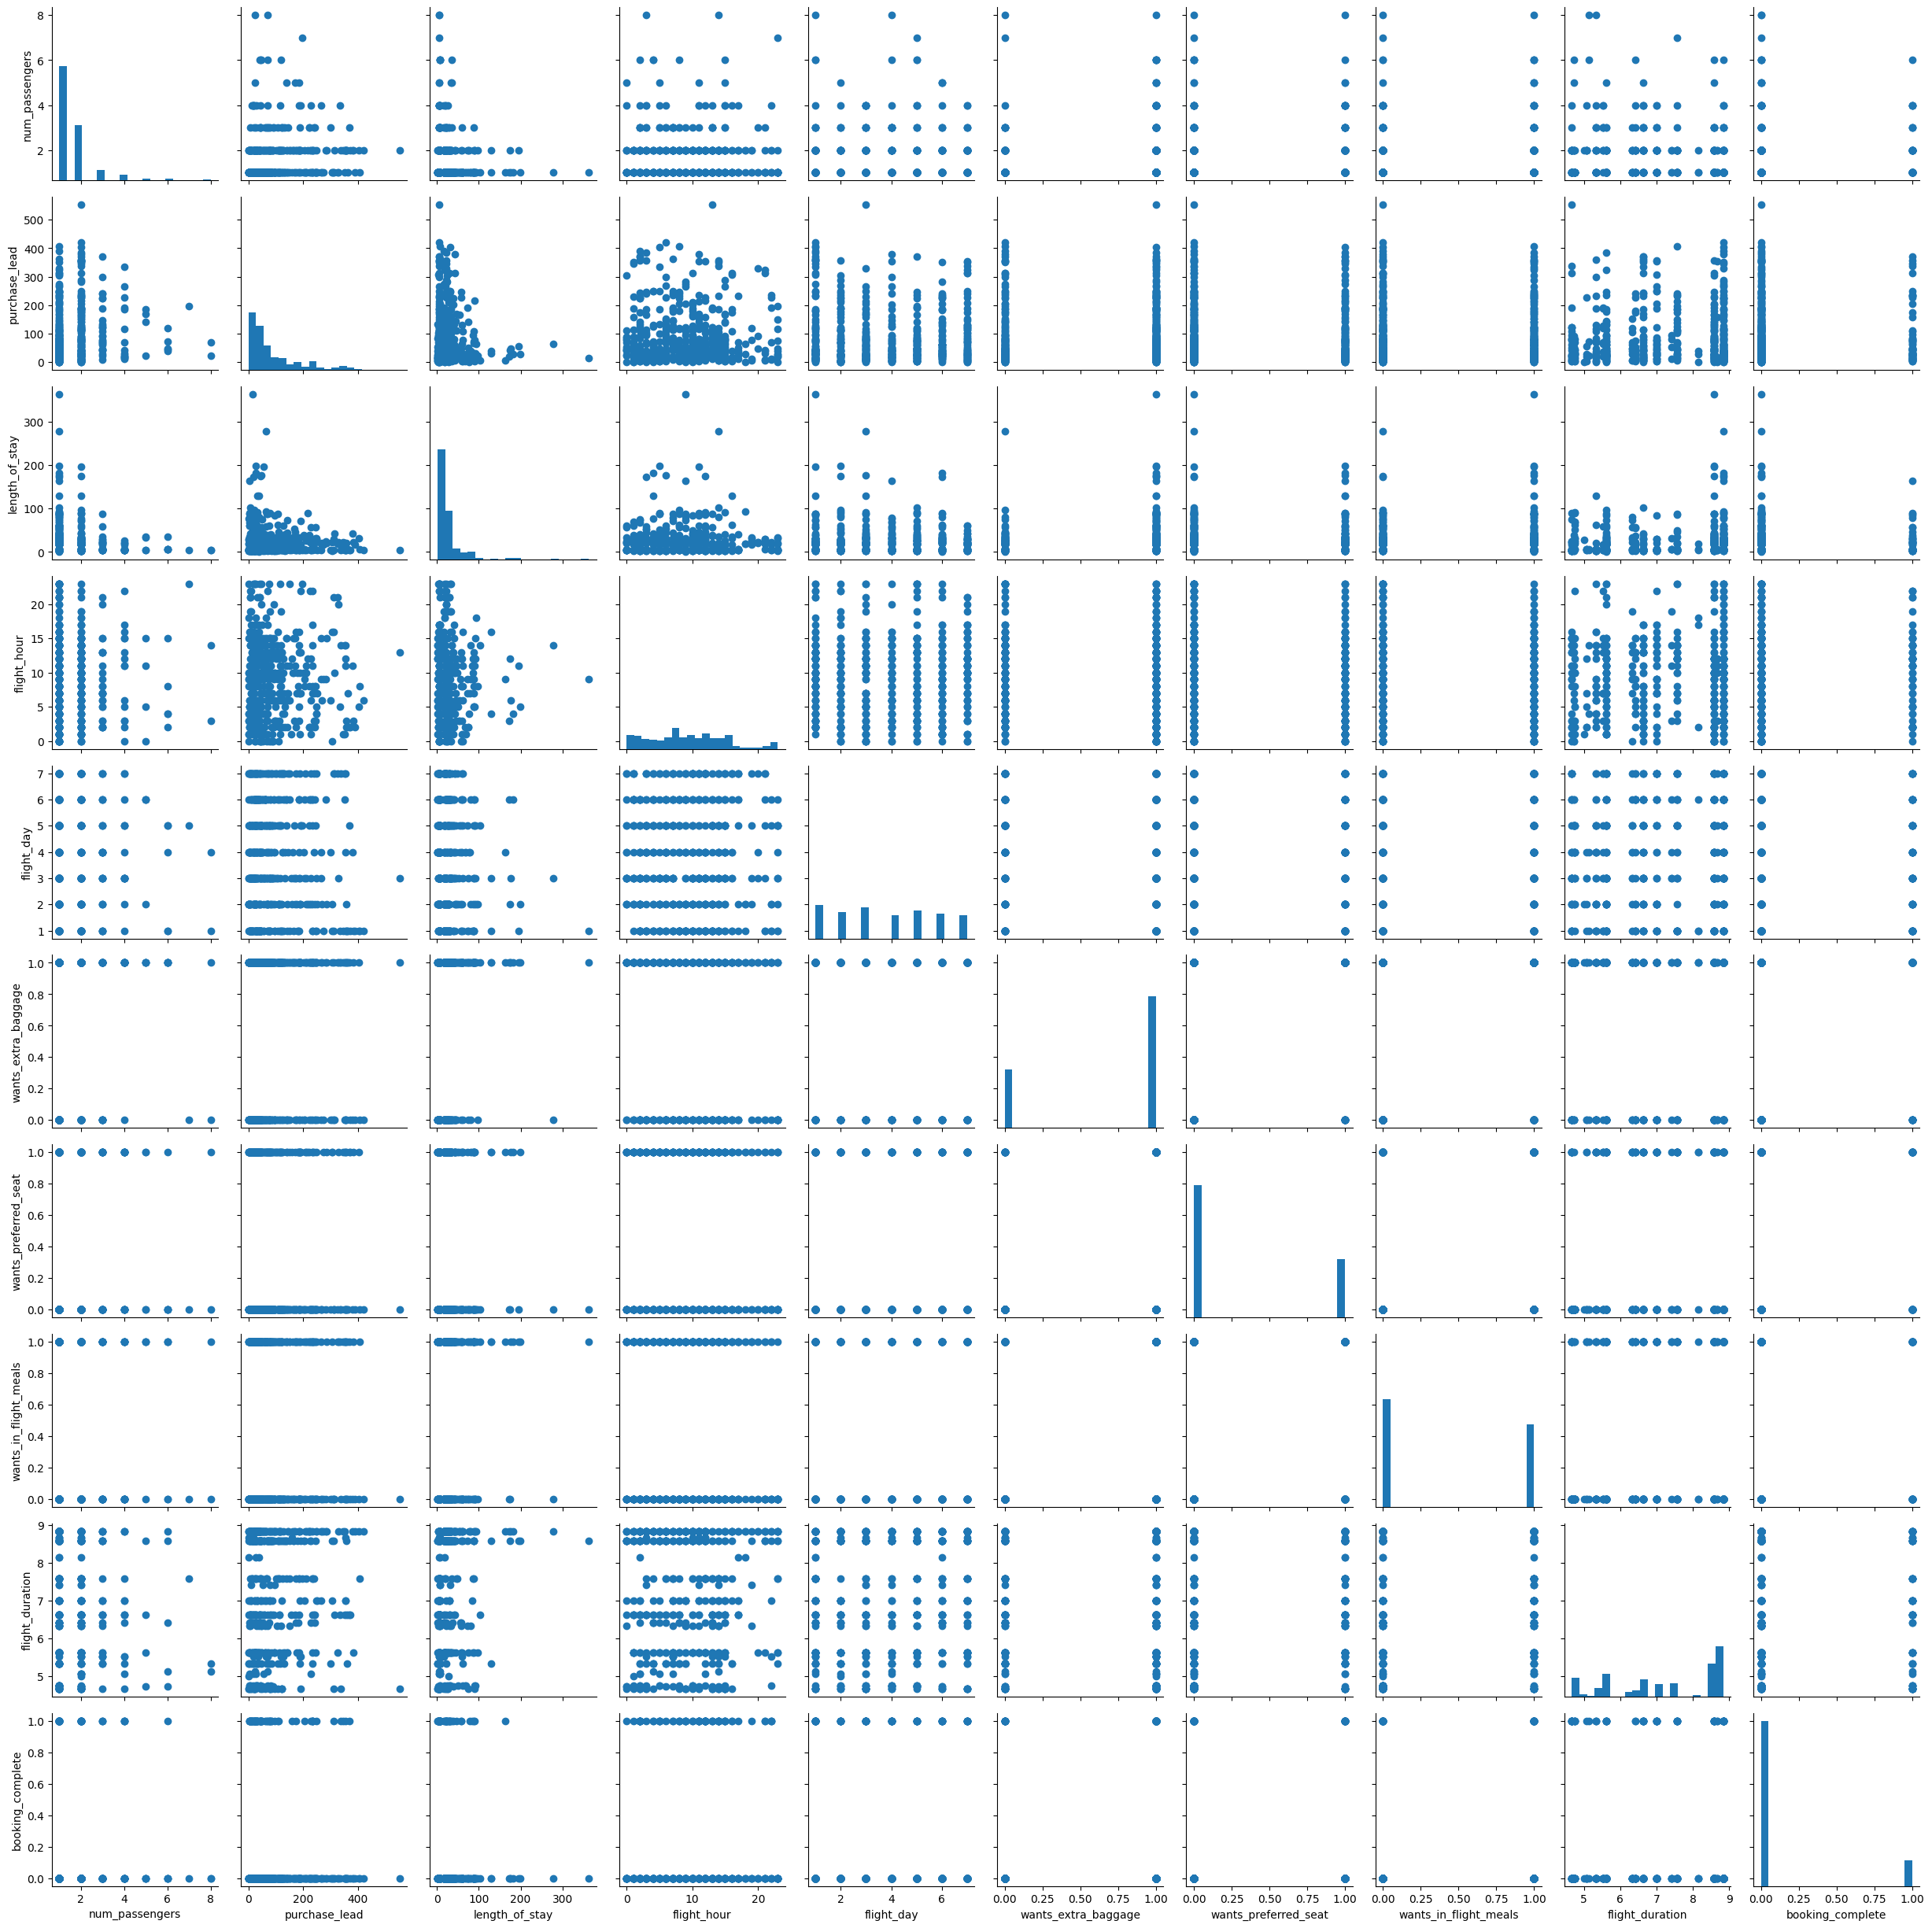

In [34]:
df_samp = df.sample(n=500, replace=False)

g = sb.PairGrid(data=df_samp, vars=numeric_var)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)

## Machine Learning Prediction

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.shape

(50000, 14)

In [127]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [128]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [129]:
df.drop(['route','booking_origin'], axis = 1, inplace=True)
df['sales_channel'] = df['sales_channel'].apply(lambda x:0 if x == 'Internet' else 1)
df['trip_type'] = df['trip_type'].apply(lambda x:0 if x == 'RoundTrip' else ( 1 if x == 'Circletrip' else 2))

In [130]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,Sat,1,0,0,5.52,0
1,1,0,0,112,20,3,Sat,0,0,0,5.52,0
2,2,0,0,243,22,17,Wed,1,1,0,5.52,0
3,1,0,0,96,31,4,Sat,0,0,1,5.52,0
4,2,0,0,68,22,15,Wed,1,0,1,5.52,0


In [131]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [132]:
df['num_passengers'].unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8], dtype=int64)

In [133]:
col_names = ['num_passengers','trip_type','purchase_lead','length_of_stay','flight_hour','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration','booking_complete']

for col in col_names:
    print(df[col].value_counts())

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64
trip_type
0    49497
2      503
Name: count, dtype: int64
purchase_lead
1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: count, Length: 470, dtype: int64
length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: count, Length: 335, dtype: int64
flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64
flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64
wants_extra_baggage
1    33439
0 

In [134]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [135]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [136]:
#Separate target column/feature
X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

In [137]:
#split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [141]:
X_train.shape, X_test.shape

((35000, 11), (15000, 11))

In [140]:
X_train.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

##### Encode variables (convert to numeric categorical)

In [142]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,5.52,0
2,2,0,0,243,22,17,3,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,1,5.52,0
4,2,0,0,68,22,15,3,1,0,1,5.52,0


### Random Forest classifier model with default parameters

In [143]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

#fit model
rfc.fit(X_train, y_train)

#predict the test set results
y_pred = rfc.predict(X_test)

#check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees: 0.8481


In [144]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)

#fit model
rfc.fit(X_train, y_train)

#predict the test set results
y_pred = rfc.predict(X_test)

#check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees: 0.8481


In [146]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [147]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

purchase_lead            0.289202
flight_hour              0.190378
length_of_stay           0.162653
flight_duration          0.116136
flight_day               0.115684
num_passengers           0.059359
wants_in_flight_meals    0.022799
wants_preferred_seat     0.017508
wants_extra_baggage      0.012521
sales_channel            0.011480
trip_type                0.002280
dtype: float64

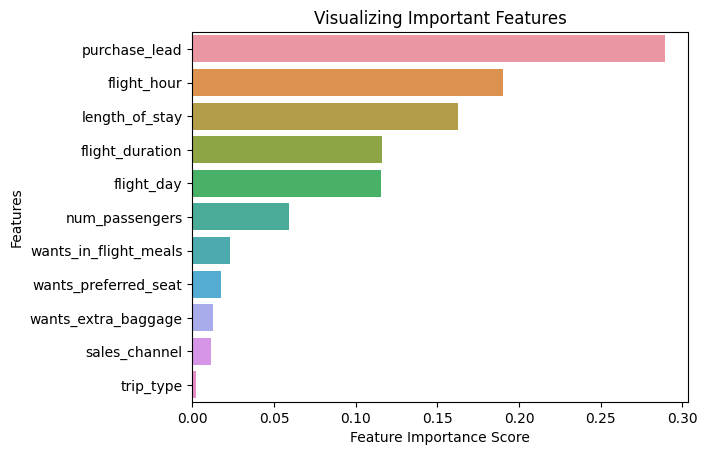

In [148]:
#visualize the feature scores of the features
sb.barplot(x=feature_scores, y=feature_scores.index)

#add labels to the path
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [111]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,5.52,0
2,2,0,0,243,22,17,3,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,1,5.52,0
4,2,0,0,68,22,15,3,1,0,1,5.52,0


In [113]:
#dropping two least important features
X = df.drop(['booking_complete', 'trip_type'], axis=1)

y = df['booking_complete']

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [121]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with trip_type variable removed: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Model accuracy score with trip_type variable removed: 0.8510


In [122]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

flight_duration          0.372903
length_of_stay           0.299109
wants_extra_baggage      0.101054
purchase_lead            0.051804
wants_preferred_seat     0.045517
sales_channel            0.036054
wants_in_flight_meals    0.031576
flight_hour              0.028036
num_passengers           0.020344
flight_day               0.013603
dtype: float64

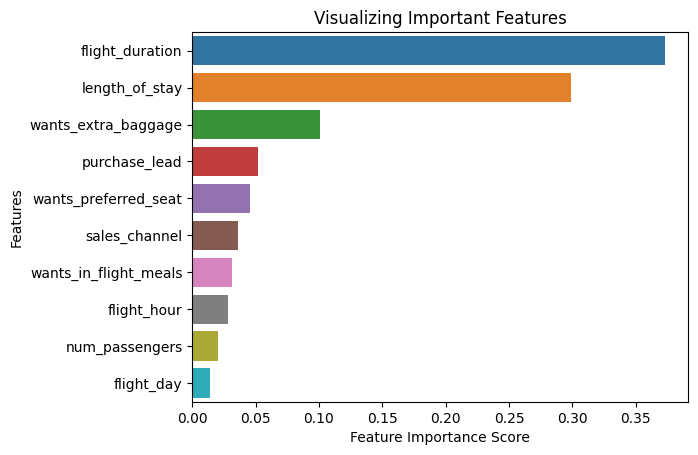

In [123]:
#visualize the feature scores of the features
sb.barplot(x=feature_scores, y=feature_scores.index)

#add labels to the path
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()